This notebook shows you how to use Pandas from Python to explore epidemic data. We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

__I'm not an epidemiologist or a virologist and just exploring data, so I will not draw conclusions on that level nor base behavior or policy upon these explorations and _neither should you_. Even within a country the data is heavily biased, not in the least because of testing and measurement policies changing over time!__

Let's go! Remove the old dataset and get the current data from EU CDC.

In [81]:
!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-07 12:21:08--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.198.54, 13.227.198.44, 13.227.198.83, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.198.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 728670 (712K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>] 711.59K  --.-KB/s    in 0.1s    

2020-05-07 12:21:08 (7.03 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [728670/728670]



Get Pandas and NumPy for feature engineering and calculations and get our plots inline.

In [82]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe `df` directly from the downloaded Excel file and have a look at the first 10 lines for format.

In [83]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', na_filter=False)
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-07,7,5,2020,168,9,Afghanistan,AF,AFG,37172386,Asia
1,2020-05-06,6,5,2020,330,5,Afghanistan,AF,AFG,37172386,Asia
2,2020-05-05,5,5,2020,190,5,Afghanistan,AF,AFG,37172386,Asia
3,2020-05-04,4,5,2020,235,13,Afghanistan,AF,AFG,37172386,Asia
4,2020-05-03,3,5,2020,134,4,Afghanistan,AF,AFG,37172386,Asia
5,2020-05-02,2,5,2020,164,4,Afghanistan,AF,AFG,37172386,Asia
6,2020-05-01,1,5,2020,222,4,Afghanistan,AF,AFG,37172386,Asia
7,2020-04-30,30,4,2020,122,0,Afghanistan,AF,AFG,37172386,Asia
8,2020-04-29,29,4,2020,124,3,Afghanistan,AF,AFG,37172386,Asia
9,2020-04-28,28,4,2020,172,0,Afghanistan,AF,AFG,37172386,Asia


Use a `count` on columns to see how many missing values we have. We would like to analyze countries by `geoId`.

In [84]:
df.count()

dateRep                    15490
day                        15490
month                      15490
year                       15490
cases                      15490
deaths                     15490
countriesAndTerritories    15490
geoId                      15490
countryterritoryCode       15490
popData2018                15490
continentExp               15490
dtype: int64

Select rows with missing `geoId`.

In [85]:
df[df['geoId'].isna()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp


Because we seemed to miss some `geoId` entries, we would drop those lines using `dropna`. They were cases from Namibia, where the country code is __NA__, which we now read as data. The resulting dataframe is pivoted so we get one row per date in `dateRep`, columns by `geoId` and the number of new `cases` and `deaths` for that date and country in the cells. Again, show the first 10 rows from our new dataframe `df_geo` to check the result of our `pivot`.

In [86]:
df_geo = df.dropna(subset=['geoId']).pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo.head(10)

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
dateRep                                                   ...                  
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-05   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-06   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-07   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-08   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-09   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
dateRep                                  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-05 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-06 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-07 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-08 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-09 NaN  0.0 NaN NaN NaN NaN NaN  

[10 rows x 418 columns]

Structure is looking good, lots of missing values, meaning there's no data for that country on the current date. We can describe the columns to get an idea of what's there.

In [87]:
df_geo.describe()

cases                                                          \
geoId         AD         AE          AF         AG         AI         AL   
count  55.000000  123.00000  119.000000  49.000000  42.000000  60.000000   
mean   13.654545  127.95122   28.504202   0.510204   0.071429  13.866667   
std    12.822460  206.14959   56.610455   1.243692   0.341650   8.106216   
min     0.000000    0.00000    0.000000   0.000000   0.000000   0.000000   
25%     2.000000    0.00000    0.000000   0.000000   0.000000   7.750000   
50%     9.000000    0.00000    0.000000   0.000000   0.000000  12.500000   
75%    21.500000  288.50000   34.500000   0.000000   0.000000  19.250000   
max    43.000000  567.00000  330.000000   6.000000   2.000000  34.000000   

                                                       ... deaths             \
geoId          AM         AO          AR           AT  ...     VC         VE   
count  120.000000  47.000000   62.000000   129.000000  ...   45.0  54.000000   
mean    23.183333   0.765957   83.790323   121.325581  ...    0.0   0.185185   
std     35.001076   1.370699   69.554351   216.070054  ...    0.0   0.516668   
min      0.000000   0.000000    0.000000     0.000000  ...    0.0   0.000000   
25%      0.000000   0.000000   12.500000     0.000000  ...    0.0   0.000000   
50%      0.000000   0.000000   86.500000     4.000000  ...    0.0   0.000000   
75%     42.250000   1.000000  131.000000   136.000000  ...    0.0   0.000000   
max    163.000000   6.000000  344.000000  1141.000000  ...    0.0   2.000000   

                                                                     \
geoId         VG         VI     VN         XK         YE         ZA   
count  42.000000  44.000000  125.0  53.000000  28.000000  61.000000   
mean    0.023810   0.090909    0.0   0.490566   0.178571   2.508197   
std     0.154303   0.290803    0.0   0.932792   0.547964   3.575952   
min     0.000000   0.000000    0.0   0.000000   0.000000   0.000000   
25%     0.000000   0.000000    0.0   0.000000   0.000000   0.000000   
50%     0.000000   0.000000    0.0   0.000000   0.000000   1.000000   
75%     0.000000   0.000000    0.0   1.000000   0.000000   4.000000   
max     1.000000   1.000000    0.0   4.000000   2.000000  14.000000   

                             
geoId         ZM         ZW  
count  50.000000  48.000000  
mean    0.080000   0.083333  
std     0.274048   0.279310  
min     0.000000   0.000000  
25%     0.000000   0.000000  
50%     0.000000   0.000000  
75%     0.000000   0.000000  
max     1.000000   1.000000  

[8 rows x 418 columns]

Get to know your data by visualization, in this case the number of new `cases` per day for my home country __NL__.

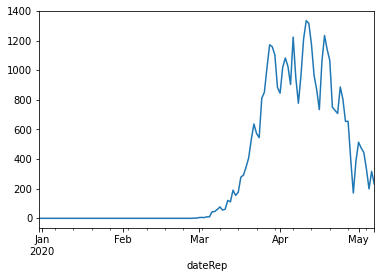

In [88]:
df_geo['cases']['NL'].plot()

Note that you could also use `df_geo.cases.NL.plot()` here, but I prefer the more explicit notation, especially in more complex statements.

Because of the pivoted data format it is just as easy to look at the number of `deaths`.

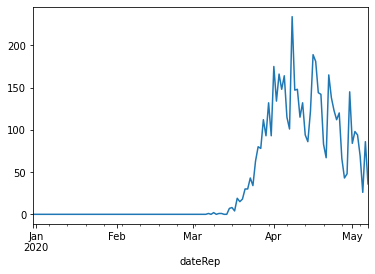

In [89]:
df_geo['deaths']['NL'].plot()

If you want both, you have to generate different slices of our pivot table (or make a new pivot), so the call is a bit different.

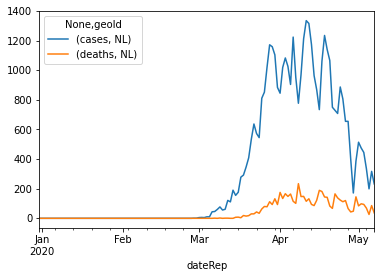

In [90]:
df_geo[[('cases', 'NL'), ('deaths', 'NL')]].plot()

What would China look like?

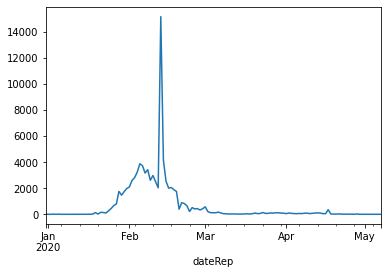

In [91]:
df_geo['cases']['CN'].plot()

The big spike in the middle was a change in counting, where they decided to count an extra 15000 cases. When was that? We select lines for `cases` in __CN__ above 2500 and show the actual number.

In [92]:
df_geo[df_geo['cases']['CN'] > 2500]['cases']['CN']

dateRep
2020-02-02     2590.0
2020-02-03     2812.0
2020-02-04     3237.0
2020-02-05     3872.0
2020-02-06     3727.0
2020-02-07     3160.0
2020-02-08     3418.0
2020-02-09     2607.0
2020-02-10     2974.0
2020-02-13    15141.0
2020-02-14     4156.0
2020-02-15     2538.0
Name: CN, dtype: float64

So what does the original record look like? We select the full record for `geoId` __CN__ and the correct date.

In [93]:
df[(df['geoId'] == 'CN') & (df['dateRep'] == '20200213')]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
3121,2020-02-13,13,2,2020,15141,254,China,CN,CHN,1392730000,Asia


After these selection examples we'll try some more advanced exploration. To see the growth in number of cases, we use a cumulative sum with `cumsum`, in this case we show __CN__ and __NL__.

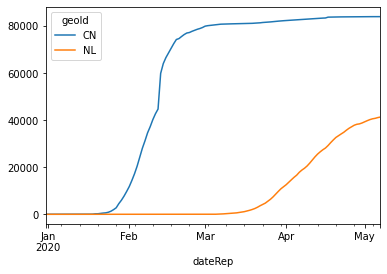

In [94]:
df_geo['cases'][['CN', 'NL']].cumsum().plot()

Because of the large difference in numbers, it may help to use a logarithmic scale. We can change the data passed to the plot using the `log10` function from NumPy. This will generate some warnings because `cases` can be zero.

<ipython-input-95-15440ac895e1>:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(df_geo['cases'][['CN', 'NL']].cumsum()).plot()


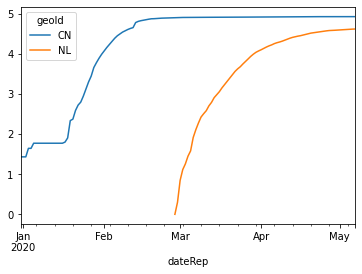

In [95]:
np.log10(df_geo['cases'][['CN', 'NL']].cumsum()).plot()

Alternatively, we ask `plot` to use a logarithmic scale.

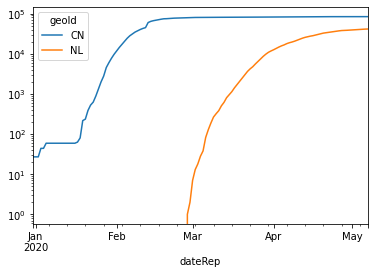

In [96]:
df_geo['cases'][['CN', 'NL']].cumsum().plot(logy=True)

This clearly shows the phases in __CN__, first some external infections, then an incubation period, then the internal infections take off. Measures like isolation and social distancing seem to work, the curve flattens and stabilizes. For __NL__ we see measures take effect. Also, no real startup curve here.

Perhaps some other countries also show this effect, have a look at your own country!

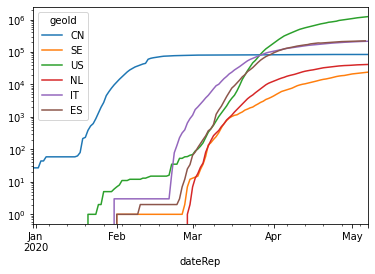

In [97]:
df_geo['cases'][['CN', 'SE', 'US', 'NL', 'IT', 'ES']].cumsum().plot(logy=True)

Another often used measure is relative growth in total number of cases per day. Therefore we need to divide the current day by the previous one, easily implemented by dividing the dataframe by the same dataframe shifted one row. Note that we are now only showing data from March 16 onwards, as specified by the `loc` method which allows us to select from the dataframe index.

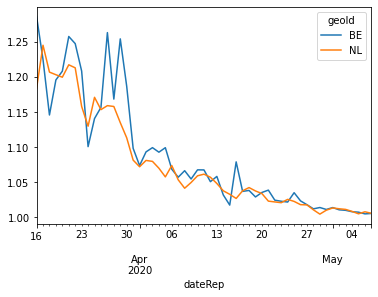

In [98]:
(df_geo.cumsum() / df_geo.shift().cumsum())\
['cases'][['BE', 'NL']].loc['20200316':].plot()

From this factor (relative increase in cases since yesterday) we can calculate the number of days to double the total amount of cases by some logarithmic magic. For __NL__ the number doubled every one or two days in the beginning but now it doubles in way over 14 days, which is a good sign (more about these 14 days later on). If this number keeps rising we will never get to the point where it doubles again.

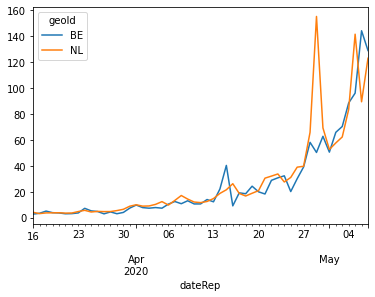

In [99]:
(np.log10(2) / np.log10(df_geo.cumsum() / df_geo.shift().cumsum()))\
['cases'][['BE', 'NL']].loc['20200316':].plot()

Rolling window functions can be used to smooth a curve, in this case the `rolling` 7 day `mean` new cases for __BE__ and __NL__.

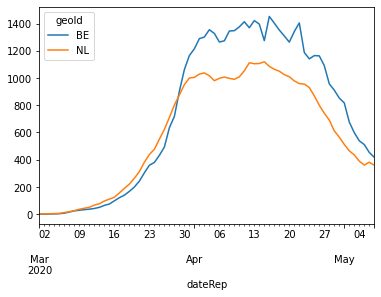

In [100]:
df_geo['cases'][['BE', 'NL']].rolling(7).mean().loc['20200301':].plot()

The default window function is a rectangle (called `boxcar`), where all values are weighed equally. Using another window function will weigh the values in the window differently, such as a triangle function which will focus more on the recent values in the window.

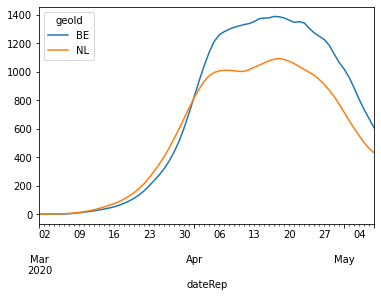

In [101]:
df_geo['cases'][['BE', 'NL']].rolling(14, win_type='triang').mean().loc['20200301':].plot()

If we use such a window on the __CN__ data you can see that the spike for 15000 cases gets more evenly distributed.

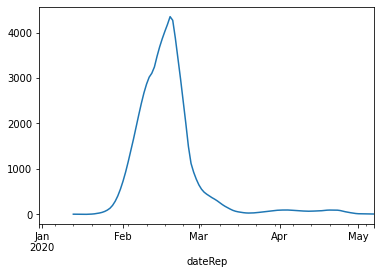

In [102]:
df_geo['cases']['CN'].rolling(14, win_type='triang').mean().plot()

Now let's have a look at _the curve_ which we are supposed to flatten, to prevent overload on our healthcare system. It shows the number of active cases (the _infected_ category in the SIR model). We assume that an infection lasts 14 days on average (which is under discussion, currently the last 14 days is used by EU CDC but other studies suggest 18 days), so we only look at new cases from the last 14 days. By leaving out older infections (the _removed_ category in SIR) this shows us the current number of active infections. Because of the triangle window we use a `mean` function to aggregate cases over the 14 day window and then multiply by 14. (The `sum` would halve the number of cases because a triangle only covers half the window.)

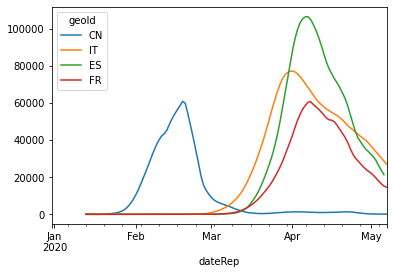

In [103]:
(df_geo['cases'][['CN', 'IT', 'ES', 'FR']].rolling(14, win_type='triang').mean() * 14).plot()

Assuming that we see about 8% of currently infected in Intensive Care, we can monitor the necessary capacity with the following graph.

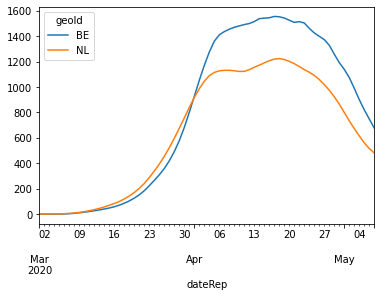

In [104]:
(df_geo['cases'][['BE', 'NL']].rolling(14, win_type='triang').mean().loc['20200301':] * 14 * 0.08).plot()

For __NL__ this more or less corresponds with the official ICU data. The actual drop in patients is probably offset by an increase in testing, so we may have to gradually lower the percentage.

In [105]:
(df_geo['cases'][['BE', 'NL']].rolling(14, win_type='triang').mean().loc['20200301':] * 14 * 0.08).tail(14)

geoId,BE,NL
dateRep,,
2020-04-24,1461.462857,1116.285714
2020-04-25,1425.417143,1091.108571
2020-04-26,1398.685714,1058.640000
2020-04-27,1373.154286,1019.177143
2020-04-28,1328.571429,974.697143
2020-04-29,1258.297143,923.874286
2020-04-30,1191.954286,864.880000
2020-05-01,1139.245714,800.228571
2020-05-02,1074.308571,734.422857


The structure of our dataframe lends itself to exploring all kinds of other measures. What about infection rate? The example below gives the average number of cases for last week divided by the infectious cases a week before, a proxy for the infamous `R` measure. We use a triangular window for smoothing and add a couple of example options for `plot`.

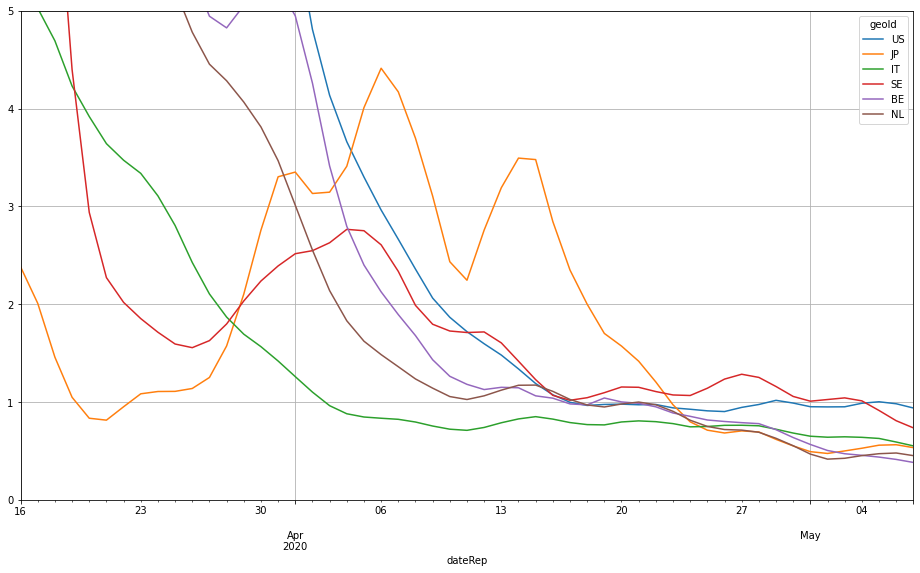

In [106]:
(df_geo.rolling(7, win_type='triang').mean() /\
 df_geo.shift(7).rolling(14, win_type='triang').mean())\
['cases'][['US', 'JP', 'IT', 'SE', 'BE', 'NL']].loc['20200316':].\
plot(figsize=(16, 9), grid=True, ylim=(0, 5))

Or what about the number of deaths in the week before as part of the number of active cases in the week before that? In other words, an estimate of the death rate *for known cases*, heavily depending on the testing and recording policies so in no way comparable across countries or even within a country over time.

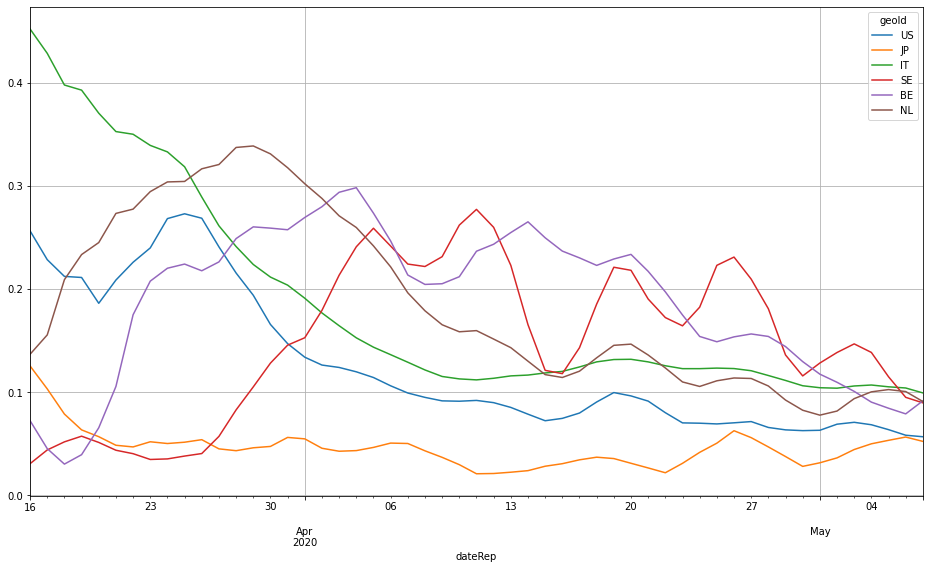

In [107]:
(df_geo.rolling(7, win_type='triang').mean()['deaths'] /\
 df_geo.shift(7).rolling(14, win_type='triang').mean()['cases'])\
[['US', 'JP', 'IT', 'SE', 'BE', 'NL']].loc['20200316':].\
plot(figsize=(16, 9), grid=True)

Instead of plotting you can also use aggregate functions at the end, such as `mean`. Again, a lot of information about the underlying assumptions and policies would be needed to interpret these numbers correctly. The numbers below are actually more a measure of test intensity, e.g. if you only test people with heavy symptoms the fatality rate will be high.

In [108]:
(df_geo.rolling(7, win_type='triang').mean()['deaths'] /\
 df_geo.shift(7).rolling(14, win_type='triang').mean()['cases'])\
[['US', 'JP', 'IT', 'SE', 'BE', 'NL']].loc['20200316':].mean()

geoId
US    0.125796
JP    0.045795
IT    0.184035
SE    0.147223
BE    0.185967
NL    0.184529
dtype: float64

Keep exploring! Stay home, wash your hands, keep your distance.